# Data Analysis: Outcome Variables

## Import Libraries

In [1]:
# Import Required Modules and Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sys

import matplotlib.pyplot as plt 

In [2]:
cd

/root


## Load Data

In [3]:
# Upload the Final Data
final_data = pd.read_csv('Project/Cleaned/final_data_preprocessed.csv', na_values = ['..'])

## Outcome Variables
The categorical value, <categorical_conflict_instances>, is a binary variable with a value of 0 being no conflict events and 1 being at least one conflict event of any kind occurring. The continuous value, <continuous_conflict_instances>, is a continuous variable taking the value of the number of conflict events of any kind occurring.

In [4]:
# Generate Categorical and Continuous Outcome Variables
final_data['categorical_conflict_instances'] = 0
final_data.loc[final_data['conflict_instances_total'] !=0, 'categorical_conflict_instances'] = 1
final_data['continuous_conflict_instances'] = final_data['conflict_instances_total'] 
final_data_x = final_data.iloc[:,:-16]

final_data_y_categorical = pd.DataFrame(final_data.loc[:,'categorical_conflict_instances'])
final_data_y_continuous = pd.DataFrame(final_data.loc[:,'continuous_conflict_instances'])
final_data_y_categorical.rename(columns = {'categorical_conflict_instances':'y'}, inplace = True) 
final_data_y_continuous.rename(columns = {'continuous_conflict_instances':'y'}, inplace = True) 

## Explore Data

In [5]:
# Averages for Categorical Outcome Variable
final_data.groupby('categorical_conflict_instances').mean()

,year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,...,conflict_instances_event_6,conflict_fatalities_event_1,conflict_fatalities_event_2,conflict_fatalities_event_3,conflict_fatalities_event_4,conflict_fatalities_event_5,conflict_fatalities_event_6,conflict_instances_total,conflict_fatalities_total,continuous_conflict_instances
categorical_conflict_instances,,,,,,,,,,,,,,,,,,,,,
0,2007.375549,212153.710440,2700.303846,547.690659,231515.353297,35.149176,13.781319,4.656319,7075.637363,4.114286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2009.689349,112176.412722,5415.079142,120.358728,219245.076183,45.139793,13.167160,2.726331,5475.576923,2.099112,...,66.377959,558.821746,182.010355,3.068047,14.721893,1.656805,175.589497,525.128698,935.868343,525.128698


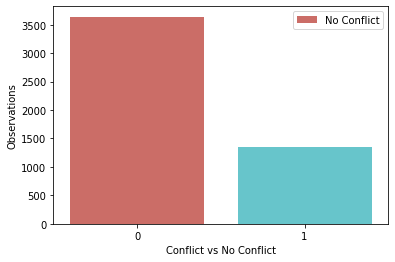

In [6]:
# Breakdown for Categorical Outcome Variable
sns.countplot(x='categorical_conflict_instances', data=final_data, palette='hls')
plt.legend(['No Conflict', 'Conflict'])

plt.xlabel('Conflict vs No Conflict')
plt.ylabel('Observations')

plt.show()

In [7]:
# Percentage of Countries and Years with and without Conflict
count_no_conflict = len(final_data[final_data['categorical_conflict_instances']==0])
count_conflict = len(final_data[final_data['categorical_conflict_instances']==1])
percentage_no_conflict = round(((count_no_conflict/(count_no_conflict+count_conflict))*100),1)
percentage_conflict = round(((count_conflict/(count_no_conflict+count_conflict))*100),1)

print("Percentage of Countries and Years with No Conflict: ", percentage_no_conflict)
print("Percentage of Countries and Years with Conflict: ", percentage_conflict)

Percentage of Countries and Years with No Conflict:  72.9
Percentage of Countries and Years with Conflict:  27.1


In [8]:
# Shape of Data
print("Shape of Data (Final): ", final_data.shape)
print("Shape of Data (Features): ", final_data_x.shape)
print("Shape of Data (Outcome - Categorical): ", final_data_y_categorical.shape)
print("Shape of Data (Outcome - Continuous): ", final_data_y_continuous.shape)

Shape of Data (Final):  (4992, 732)
Shape of Data (Features):  (4992, 716)
Shape of Data (Outcome - Categorical):  (4992, 1)
Shape of Data (Outcome - Continuous):  (4992, 1)


## Save Pre-processed Data

In [9]:
# Save Data
final_data_x.to_csv('Project/Cleaned/final_data_x.csv')
final_data_y_categorical.to_csv('Project/Cleaned/final_data_y_categorical.csv')
final_data_y_continuous.to_csv('Project/Cleaned/final_data_y_continuous.csv')